In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
!python -V

Python 3.9.16


Download dataset from here
https://finance.yahoo.com/quote/MSFT/history?period1=511056000&period2=1679702400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

In [5]:
#Using microsoft stock prices dataset from yahoo finance
df=pd.read_csv('MSFT.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060657,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062823,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063907,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062281,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061198,47894400


In [6]:
df.shape

(9334, 7)

In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
9329,2023-03-20,276.980011,277.480011,269.850006,272.230011,272.230011,43466600
9330,2023-03-21,274.880005,275.000000,269.519989,273.779999,273.779999,34558700
9331,2023-03-22,273.399994,281.040009,272.179993,272.290009,272.290009,34873300
9332,2023-03-23,277.940002,281.059998,275.200012,277.660004,277.660004,36610900
9333,2023-03-24,277.239990,280.630005,275.279999,280.570007,280.570007,28172000


In [8]:
df=df[['Date','Close']]

In [9]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9329    2023-03-20
9330    2023-03-21
9331    2023-03-22
9332    2023-03-23
9333    2023-03-24
Name: Date, Length: 9334, dtype: object

In [10]:
#Change the datatype of date 
import datetime
from datetime import datetime
def str_to_datetime(s):
    date_time_obj = datetime.strptime(s, '%Y-%m-%d').date()
    print ("The type of the date is now",  type(date_time_obj))
    print ("The date is", date_time_obj)

In [11]:
str_to_datetime('2023-03-24')

The type of the date is now <class 'datetime.date'>
The date is 2023-03-24


In [12]:
#Using a simpler method
def str_to_datetime(s):
    split=s.split('-')
    year,month,day=int(split[0]),int(split[1]),int(split[2])
    return datetime(year=year,month=month,day=day)


In [13]:
datetime_object=str_to_datetime('2023-03-24')
datetime_object

datetime.datetime(2023, 3, 24, 0, 0)

In [14]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9329,2023-03-20,272.230011
9330,2023-03-21,273.779999
9331,2023-03-22,272.290009
9332,2023-03-23,277.660004


In [15]:
df['Date']=df['Date'].apply(str_to_datetime)

In [16]:
df['Date']  #dtype: datetime64[ns]

0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9329   2023-03-20
9330   2023-03-21
9331   2023-03-22
9332   2023-03-23
9333   2023-03-24
Name: Date, Length: 9334, dtype: datetime64[ns]

In [17]:
df.index=df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-03-20,272.230011
2023-03-21,273.779999
2023-03-22,272.290009


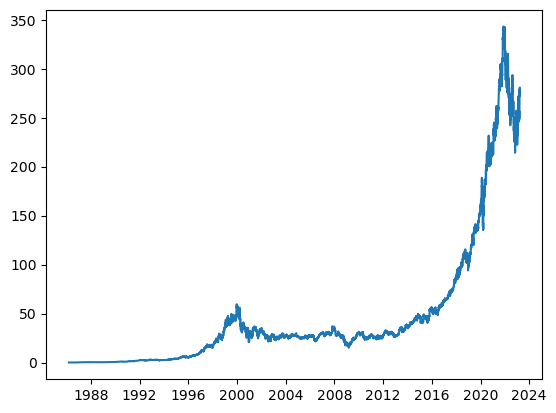

In [18]:
plt.plot(df.index,df['Close'])

In [19]:
a=[22,3,4,55]
a[:-1]

[22, 3, 4]

In [20]:
def df_to_windowed_df(dataframe,first_date_str,last_date_str,n=3):
    first_date=str_to_datetime(first_date_str)
    last_date=str_to_datetime(last_date_str)
    
    target_date=first_date
    
    dates=[]
    X,Y=[],[]
    last_time=False
    while True:
        df_subset=dataframe.loc[:target_date].tail(n+1)
        if len(df_subset)!=n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return
        values=df_subset['Close'].to_numpy()
        x,y=values[:-1],values[-1]
        
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        
        next_week=dataframe.loc[target_date:target_date+timedelta(days=7)]
        next_datetime_str=str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime(day=int(day), month=int(month), year=int(year))
        
        if last_time:
            break
        target_date=next_date
        if target_date==last_date:
            last_time=True
    ret_df=pd.DataFrame({})
    ret_df['Target Date']=dates
    X=np.array(X)
    for i in range(0,n):
        print(X[:, i].shape)
        ret_df[f'Target-{n-i}'] = X[:, i]
    ret_df['Target'] = Y
    print(X)
    return ret_df,X

In [21]:
from datetime import timedelta

In [47]:
windowed_df,X = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23',  
                                n=3)
windowed_df

(252,)
(252,)
(252,)
[[235.990005 237.580002 235.460007]
 [237.580002 235.460007 232.339996]
 [235.460007 232.339996 236.479996]
 [232.339996 236.479996 235.240005]
 [236.479996 235.240005 231.850006]
 [235.240005 231.850006 235.770004]
 [231.850006 235.770004 242.350006]
 [235.770004 242.350006 249.070007]
 [242.350006 249.070007 247.860001]
 [249.070007 247.860001 249.899994]
 [247.860001 249.899994 253.25    ]
 [249.899994 253.25     255.850006]
 [253.25     255.850006 255.910004]
 [255.850006 255.910004 258.48999 ]
 [255.910004 258.48999  255.589996]
 [258.48999  255.589996 259.5     ]
 [255.589996 259.5      260.73999 ]
 [259.5      260.73999  258.73999 ]
 [260.73999  258.73999  258.26001 ]
 [258.73999  258.26001  260.579987]
 [258.26001  260.579987 257.170013]
 [260.579987 257.170013 261.149994]
 [257.170013 261.149994 261.549988]
 [261.149994 261.549988 261.970001]
 [261.549988 261.970001 254.559998]
 [261.970001 254.559998 252.509995]
 [254.559998 252.509995 252.179993]
 [252.5

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,235.990005,237.580002,235.460007,232.339996
1,2021-03-26,237.580002,235.460007,232.339996,236.479996
2,2021-03-29,235.460007,232.339996,236.479996,235.240005
3,2021-03-30,232.339996,236.479996,235.240005,231.850006
4,2021-03-31,236.479996,235.240005,231.850006,235.770004
...,...,...,...,...,...
247,2022-03-17,276.440002,287.149994,294.390015,295.220001
248,2022-03-18,287.149994,294.390015,295.220001,300.429993
249,2022-03-21,294.390015,295.220001,300.429993,299.160004
250,2022-03-22,295.220001,300.429993,299.160004,304.059998


In [48]:
X[:,1]

array([237.580002, 235.460007, 232.339996, 236.479996, 235.240005,
       231.850006, 235.770004, 242.350006, 249.070007, 247.860001,
       249.899994, 253.25    , 255.850006, 255.910004, 258.48999 ,
       255.589996, 259.5     , 260.73999 , 258.73999 , 258.26001 ,
       260.579987, 257.170013, 261.149994, 261.549988, 261.970001,
       254.559998, 252.509995, 252.179993, 251.860001, 247.789993,
       246.470001, 249.729996, 252.460007, 247.179993, 246.229996,
       239.      , 243.029999, 248.149994, 245.179993, 243.080002,
       243.119995, 246.479996, 245.169998, 250.779999, 251.720001,
       251.490005, 249.309998, 249.679993, 247.399994, 247.300003,
       245.710007, 250.789993, 253.809998, 252.570007, 253.589996,
       257.23999 , 257.890015, 259.890015, 258.359985, 257.380005,
       260.899994, 259.429993, 262.630005, 265.51001 , 265.269989,
       266.690002, 265.019989, 268.720001, 271.399994, 270.899994,
       271.600006, 277.649994, 277.660004, 279.929993, 277.420

In [49]:
df.index[9]

Timestamp('1986-03-26 00:00:00')

In [50]:
a=np.array([[1,2],
           [3,4],
           [5,6]])
a[:,1]


array([2, 4, 6])

In [51]:
# Chekcing codes meaning 
date_str = '09-19-2022'
# date_str ='03-17-1986'
date_object = datetime.strptime(date_str, '%m-%d-%Y').date()
print(type(date_object))
print(date_object)

df.loc[:date_object].tail(4)

<class 'datetime.date'>
2022-09-19


,Close
Date,
2022-09-14,252.220001
2022-09-15,245.380005
2022-09-16,244.740005
2022-09-19,244.520004


In [52]:
next_week=df.loc[date_object:date_object+timedelta(days=7)]
next_week

,Close
Date,
2022-09-19,244.520004
2022-09-20,242.449997
2022-09-21,238.949997
2022-09-22,240.979996
2022-09-23,237.919998
2022-09-26,237.449997


In [53]:
next_datetime_str=str(next_week.head(2).tail(1).index.values[0])  #numpy.datetime64('2022-09-20T00:00:00.000000000')
next_datetime_str

'2022-09-20T00:00:00.000000000'

In [54]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np=windowed_dataframe.to_numpy()
    dates=df_as_np[:,0]
    middle_matrix=df_as_np[:,1:-1]
    X=middle_matrix.reshape((len(dates),middle_matrix.shape[1],1))
    Y=df_as_np[:,-1]
    return dates,X.astype(np.float32),Y.astype(np.float32)
dates ,X,y=windowed_df_to_date_X_y(windowed_df)
dates.shape,X.shape,y.shape

((252,), (252, 3, 1), (252,))

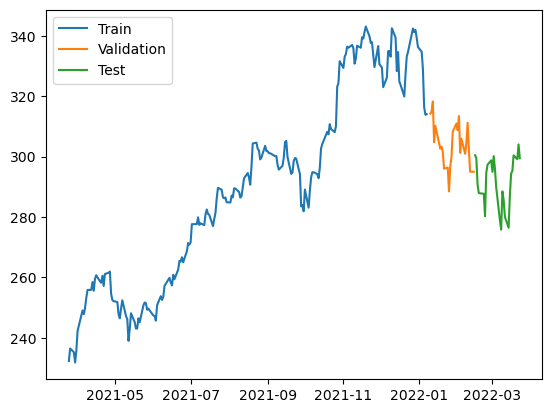

In [55]:
q_80=int(len(dates)*.8)
q_90=int(len(dates)*.9)

dates_train,X_train,y_train=dates[:q_80],X[:q_80],y[:q_80]
dates_val,X_val,y_val=dates[q_80:q_90],X[q_80:q_90],y[q_80:q_90]
dates_test,X_test,y_test=dates[q_90:],X[q_90:],y[q_90:]  

plt.plot(dates_train,y_train)
plt.plot(dates_val,y_val)
plt.plot(dates_test,y_test)

plt.legend(['Train','Validation','Test'])

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [57]:
model=Sequential([
        layers.Input((3,1)),
        layers.LSTM(64),
        layers.Dense(32,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(1)
])
model.compile(loss='mse',
             optimizer=Adam(learning_rate=0.001),
             metrics=['mean_absolute_error'])

In [58]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 64ms/step - loss: 84755.5312 - mean_absolute_error: 289.3886 - val_loss: 92449.4297 - val_mean_absolute_error: 303.9679
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 84557.9922 - mean_absolute_error: 289.0459 - val_loss: 92316.4219 - val_mean_absolute_error: 303.7490
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 84416.3984 - mean_absolute_error: 288.8012 - val_loss: 92118.8438 - val_mean_absolute_error: 303.4236
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 84188.5938 - mean_absolute_error: 288.4049 - val_loss: 91822.3828 - val_mean_absolute_error: 302.9347
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 83880.3281 - mean_absolute_error: 287.8714 - val_loss: 91426.6172 - val_mean_absolute_error: 302.2807
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 83426.5156 - mean_absolute_error: 287.0808 - val_loss: 90820.5

Epoch 49/100
7/7 [==============================] - 0s 8ms/step - loss: 962.4932 - mean_absolute_error: 26.2103 - val_loss: 276.0098 - val_mean_absolute_error: 15.0324
Epoch 50/100
7/7 [==============================] - 0s 7ms/step - loss: 957.1978 - mean_absolute_error: 26.1615 - val_loss: 288.8144 - val_mean_absolute_error: 15.4235
Epoch 51/100
7/7 [==============================] - 0s 8ms/step - loss: 954.6176 - mean_absolute_error: 26.1183 - val_loss: 257.9681 - val_mean_absolute_error: 14.4711
Epoch 52/100
7/7 [==============================] - 0s 8ms/step - loss: 951.1075 - mean_absolute_error: 26.0659 - val_loss: 257.7958 - val_mean_absolute_error: 14.4687
Epoch 53/100
7/7 [==============================] - 0s 8ms/step - loss: 948.1022 - mean_absolute_error: 26.0116 - val_loss: 259.5328 - val_mean_absolute_error: 14.5275
Epoch 54/100
7/7 [==============================] - 0s 8ms/step - loss: 947.6716 - mean_absolute_error: 26.0400 - val_loss: 267.7323 - val_mean_absolute_error: 

7/7 [==============================] - 0s 7ms/step - loss: 39.7703 - mean_absolute_error: 4.7699 - val_loss: 31.4616 - val_mean_absolute_error: 4.8039
Epoch 99/100
7/7 [==============================] - 0s 8ms/step - loss: 34.7886 - mean_absolute_error: 4.4464 - val_loss: 39.3020 - val_mean_absolute_error: 5.0213
Epoch 100/100
7/7 [==============================] - 0s 7ms/step - loss: 31.7756 - mean_absolute_error: 4.2593 - val_loss: 48.0933 - val_mean_absolute_error: 5.5363


In [59]:
tf.test.is_built_with_cuda()

True

In [60]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

7/7 [==============================] - 0s 2ms/step


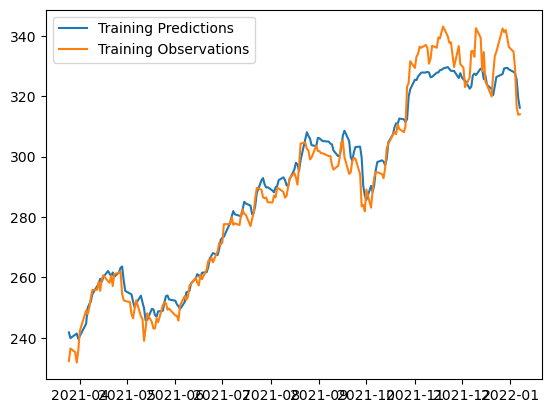

In [61]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 18ms/step


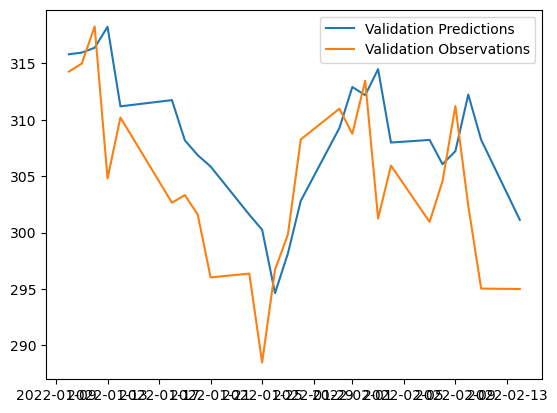

In [62]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 18ms/step


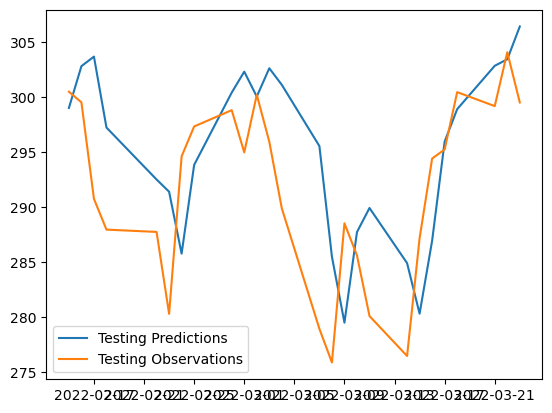

In [63]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

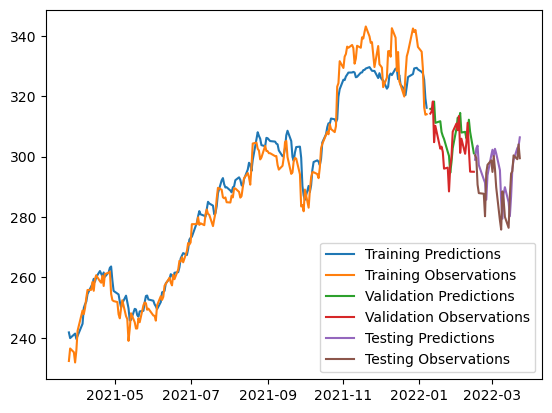

In [64]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [65]:
# from copy import deepcopy

# recursive_predictions = []
# recursive_dates = np.concatenate([dates_val, dates_test])
# last_window = deepcopy(X_train[-1])

# for target_date in recursive_dates:
#     print(last_window)
#     next_prediction = model.predict(np.array([last_window])).flatten()
#     recursive_predictions.append(next_prediction)
#     new_window = list(last_window[1:])
#     new_window.append(next_prediction)
#     new_window = np.array(new_window)
#     last_window = new_window

    
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])
last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    new_window = list(last_window[1:])
    new_window.append(next_prediction)
    new_window = np.array(new_window)
    last_window = new_window


1/1 [==============================] - 0s 17ms/step


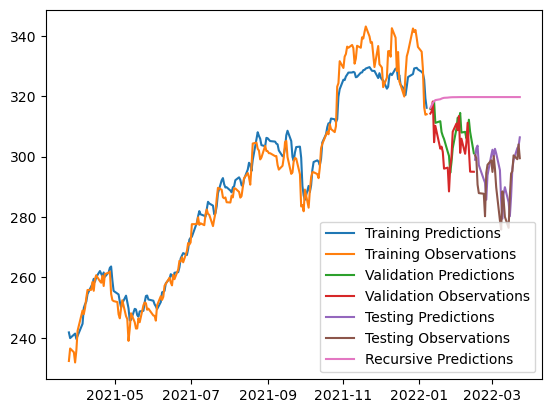

In [66]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])